
# Assignment 1: Code for dataset preparation report

# Table of Contents
- [1. Preparation of Raw Data](#1-preparation-of-raw-data)
  - [1.1 Data Retrieving](#11-data-retrieving)
  - [1.2 Check Data Type](#12-check-data-type)
  - [1.3 Typos](#13-typos)
  - [1.4 Extra Whitespace](#14-extra-whitespace)
  - [1.5 Upper/Lower-Case](#15-upperlower-case)
  - [1.6 Sanity Checks Part 1 - Check of Categorical Data](#16-sanity-checks-part-1---check-of-categorical-data)
  - [1.7 Missing Values](#17-missing-values)
  - [1.8 Correcting Variable Types](#18-correcting-variable-types)
  - [1.9 Sanity Check Part 2](#19-sanity-check-part-2)

- [2. Exploratory Data Analysis (EDA)](#2-exploratory-data-analysis-eda)
  - [2.1 Analysis on Three Variables](#21-analysis-on-three-variables)
  - [2.2 Relationships Between Variables](#22-relationships-between-variables)
    - [2.2.1 Relation Between Years At Company and Monthly Income](#221-relation-between-years-at-company-and-monthly-income)
    - [2.2.2 Correlation Between MonthlyIncome and EducationLevel](#222-correlation-between-monthlyincome-and-educationlevel)
    - [2.2.3 Correlation Between Eight Selected Variables of All Data Kinds](#223-correlation-between-eight-selected-variables-of-all-data-kinds)

# 1. Preparation of raw data

The below code downloads all necessary libraries needed for this assignment.

In [1]:
# Load all necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 1.1 Data Retrieving

First, we import the CSV file, check the rows and columns and display the first five columns of the dataframe df.

In [2]:
# Data Retrieving, leaving all columns as per csv
df = pd.read_csv('A1_HR_Employee_Data.csv',sep = ',', decimal = '.', header = 0)

In [3]:
# Print Rows and Columns
print(f'Our dataframe "df" has {df.shape[0]} rows, and {df.shape[1]} columns.')

Our dataframe "df" has 1482 rows, and 22 columns.


In [4]:
# Display all Variables in the dataframe
pd.set_option('display.max_columns', None)
df.head()

,EmployeeID,Age,Resigned,BusinessTravel,BusinessUnit,EducationLevel,Gender,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,AverageWeeklyHoursWorked,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInRole,YearsSinceLastPromotion,YearsWithCurrManager
0,7912,41,Yes,Travel_Rarely,Sales,2.0,Female,4.0,Single,5993.0,8,Yes,11,3,63.0,8,0,1.0,6,4,0,5
1,1520,49,No,Travel_Frequently,Consultants,1.0,Male,2.0,Married,5130.0,1,No,23,4,40.0,10,3,3.0,10,7,1,7
2,1488,37,Yes,Travel_Rarely,Consultants,2.0,Male,3.0,Single,2090.0,6,Yes,15,3,50.0,7,3,3.0,0,0,0,0
3,2535,33,No,Travel_Frequently,Consultants,4.0,Female,3.0,Married,2909.0,1,Yes,11,3,48.0,8,3,3.0,8,7,3,0
4,4582,27,No,Travel_Rarely,Consultants,1.0,Male,2.0,Married,3468.0,9,No,12,3,40.0,6,3,3.0,2,2,2,2


### 1.2 Check data type

We perform simple statistics on our dataframe to generate an idea of what kind of data we are working with and how many unique values each column holds.

In [5]:
# Check data type
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1482 entries, 0 to 1481
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmployeeID                1482 non-null   int64  
 1   Age                       1482 non-null   object 
 2   Resigned                  1480 non-null   object 
 3   BusinessTravel            1482 non-null   object 
 4   BusinessUnit              1482 non-null   object 
 5   EducationLevel            1481 non-null   float64
 6   Gender                    1482 non-null   object 
 7   JobSatisfaction           1481 non-null   float64
 8   MaritalStatus             1482 non-null   object 
 9   MonthlyIncome             1479 non-null   float64
 10  NumCompaniesWorked        1482 non-null   int64  
 11  OverTime                  1479 non-null   object 
 12  PercentSalaryHike         1482 non-null   int64  
 13  PerformanceRating         1482 non-null   int64  
 14  AverageW

In [6]:
# Display all columns with their unique values
for col in df.columns:
    print(f'{col}, {df[col].nunique()}')

EmployeeID, 1482
Age, 44
Resigned, 6
BusinessTravel, 6
BusinessUnit, 4
EducationLevel, 5
Gender, 8
JobSatisfaction, 4
MaritalStatus, 6
MonthlyIncome, 1354
NumCompaniesWorked, 10
OverTime, 2
PercentSalaryHike, 18
PerformanceRating, 3
AverageWeeklyHoursWorked, 24
TotalWorkingYears, 40
TrainingTimesLastYear, 7
WorkLifeBalance, 4
YearsAtCompany, 37
YearsInRole, 19
YearsSinceLastPromotion, 16
YearsWithCurrManager, 18


In [7]:
# Display each column and the actual values including all missing values
for col in df.columns:
    print(f'Column: {col}\n, Values: {df[col].value_counts(dropna=False)}\n')

Column: EmployeeID
, Values: 7912    1
7522    1
4375    1
9735    1
3000    1
       ..
7812    1
8633    1
6421    1
7678    1
3238    1
Name: EmployeeID, Length: 1482, dtype: int64

Column: Age
, Values: 35     78
34     77
36     70
31     69
29     68
32     62
30     60
38     59
33     59
40     58
37     50
28     48
27     48
42     46
39     42
26     42
45     41
41     40
44     33
46     33
43     32
50     30
24     26
25     26
49     24
47     24
55     22
51     19
48     19
53     19
54     18
52     18
22     16
56     15
23     15
21     14
58     14
20     11
59     10
19      9
18      8
60      5
57      4
36a     1
Name: Age, dtype: int64

Column: Resigned
, Values: No     1238
Yes     238
NaN       2
Y         1
NO        1
N         1
no        1
Name: Resigned, dtype: int64

Column: BusinessTravel
, Values: Travel_Rarely        1048
Travel_Frequently     279
Non-Travel            152
Travels_Rarely          1
TRAVEL_RARELY           1
rarely_travel           

### 1.3 Typos

Next, we start tidying our values by exploring each unique entry per column, veryfying the results and fixing Typos.

In [8]:
# We can iterate through our variables to check if any Typos are hidding in the values
column_names = df.columns
for column in column_names:
    print(f"Unique values in {column}:")
    print(f"{df[column].unique()}\n")

Unique values in EmployeeID:
[7912 1520 1488 ... 9017 2477 3238]

Unique values in Age:
['41' '49' '37' '33' '27' '32' '59' '30' '38' '36' '35' '29' '31' '34'
 '28' '22' '53' '24' '21' '42' '44' '46' '39' '43' '50' '26' '48' '55'
 '45' '56' '23' '51' '40' '54' '58' '20' '25' '19' '57' '52' '47' '18'
 '60' '36a']

Unique values in Resigned:
['Yes' 'No' 'Y' nan 'NO' 'N' 'no']

Unique values in BusinessTravel:
['Travel_Rarely' 'Travel_Frequently' 'Non-Travel' 'Travels_Rarely'
 'TRAVEL_RARELY' 'rarely_travel']

Unique values in BusinessUnit:
['Sales' 'Consultants' 'Business Operations' 'Female']

Unique values in EducationLevel:
[ 2.  1.  4.  3.  5. nan]

Unique values in Gender:
['Female' 'Male' '      Male' '    Female' 'Sales' 'MMale' 'M' 'male']

Unique values in JobSatisfaction:
[ 4.  2.  3.  1. nan]

Unique values in MaritalStatus:
['Single' 'Married' 'Divorced' '       Divorced' '         Single' 'D']

Unique values in MonthlyIncome:
[5993. 5130. 2090. ... 3935. 3700. 4802.]

Unique

In [9]:
# Double check the values Age
df['Age'].value_counts()

35     78
34     77
36     70
31     69
29     68
32     62
30     60
38     59
33     59
40     58
37     50
28     48
27     48
42     46
39     42
26     42
45     41
41     40
44     33
46     33
43     32
50     30
24     26
25     26
49     24
47     24
55     22
51     19
48     19
53     19
54     18
52     18
22     16
56     15
23     15
21     14
58     14
20     11
59     10
19      9
18      8
60      5
57      4
36a     1
Name: Age, dtype: int64

In [10]:
# Double check values Resinged
df['Resigned'].value_counts()

No     1238
Yes     238
Y         1
NO        1
N         1
no        1
Name: Resigned, dtype: int64

In [11]:
# Double check values BusinessTravel
df['BusinessTravel'].value_counts()

Travel_Rarely        1048
Travel_Frequently     279
Non-Travel            152
Travels_Rarely          1
TRAVEL_RARELY           1
rarely_travel           1
Name: BusinessTravel, dtype: int64

In [12]:
# Double check values Gender
df['Gender'].value_counts()

Male          882
Female        591
    Female      3
      Male      2
Sales           1
MMale           1
M               1
male            1
Name: Gender, dtype: int64

In [13]:
# Double check values MaritalStatus
df['MaritalStatus'].value_counts()

Married            679
Single             474
Divorced           326
       Divorced      1
         Single      1
D                    1
Name: MaritalStatus, dtype: int64

In [14]:
# Fixing the typos
df['Age'].replace('36a', '36', inplace = True) #The typo '36a' coerced the rest of values to an object type instead of an integer since '36a' can't be an integer
df['Resigned'].replace(['Y', 'N'], ['Yes','No'], inplace = True) #Change 'Y' to 'Yes' and 'N' to 'No'
df['BusinessTravel'].replace(['Travels_Rarely', 'rarely_travel'],'Travel_Rarely', inplace = True) #Fix the typos
df['Gender'].replace(['MMale','M'], 'Male', inplace = True)
df['MaritalStatus'].replace('D', 'Divorced', inplace = True)

### 1.4 Extra whitespace

The next step in our data preparation process is the removal of all whitespace before and after each string for furthe analysis.

In [15]:
# We print all columns to check if whitespace exists.
for column in df.columns:
    print(f"Unique values in {column}:")
    print(f"{df[column].unique()}\n")

Unique values in EmployeeID:
[7912 1520 1488 ... 9017 2477 3238]

Unique values in Age:
['41' '49' '37' '33' '27' '32' '59' '30' '38' '36' '35' '29' '31' '34'
 '28' '22' '53' '24' '21' '42' '44' '46' '39' '43' '50' '26' '48' '55'
 '45' '56' '23' '51' '40' '54' '58' '20' '25' '19' '57' '52' '47' '18'
 '60']

Unique values in Resigned:
['Yes' 'No' nan 'NO' 'no']

Unique values in BusinessTravel:
['Travel_Rarely' 'Travel_Frequently' 'Non-Travel' 'TRAVEL_RARELY']

Unique values in BusinessUnit:
['Sales' 'Consultants' 'Business Operations' 'Female']

Unique values in EducationLevel:
[ 2.  1.  4.  3.  5. nan]

Unique values in Gender:
['Female' 'Male' '      Male' '    Female' 'Sales' 'male']

Unique values in JobSatisfaction:
[ 4.  2.  3.  1. nan]

Unique values in MaritalStatus:
['Single' 'Married' 'Divorced' '       Divorced' '         Single']

Unique values in MonthlyIncome:
[5993. 5130. 2090. ... 3935. 3700. 4802.]

Unique values in NumCompaniesWorked:
[8 1 6 9 0 4 5 2 7 3]

Unique val

Printing all the result of all variables, numerical variables <b>CAN'T contain whitespace.
Whitespace in a numerical variable would coerce the type to a string type! 

In [16]:
# Fixing extra white space
column_names = df.columns
for column in column_names:
    if df[column].dtype == 'object':
        df[column] = df[column].apply(lambda x: x.strip() if isinstance(x, str) else x)

### 1.5 Upper/Lower-case

We perform a for loop to change all text data into upper case letters. This unifies the values.

In [17]:
# Cast all text data to upper-case  
categorical_data = df.select_dtypes('object')
df[categorical_data.columns] = categorical_data.apply(lambda x:x.str.upper())
df.head()

,EmployeeID,Age,Resigned,BusinessTravel,BusinessUnit,EducationLevel,Gender,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,AverageWeeklyHoursWorked,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInRole,YearsSinceLastPromotion,YearsWithCurrManager
0,7912,41,YES,TRAVEL_RARELY,SALES,2.0,FEMALE,4.0,SINGLE,5993.0,8,YES,11,3,63.0,8,0,1.0,6,4,0,5
1,1520,49,NO,TRAVEL_FREQUENTLY,CONSULTANTS,1.0,MALE,2.0,MARRIED,5130.0,1,NO,23,4,40.0,10,3,3.0,10,7,1,7
2,1488,37,YES,TRAVEL_RARELY,CONSULTANTS,2.0,MALE,3.0,SINGLE,2090.0,6,YES,15,3,50.0,7,3,3.0,0,0,0,0
3,2535,33,NO,TRAVEL_FREQUENTLY,CONSULTANTS,4.0,FEMALE,3.0,MARRIED,2909.0,1,YES,11,3,48.0,8,3,3.0,8,7,3,0
4,4582,27,NO,TRAVEL_RARELY,CONSULTANTS,1.0,MALE,2.0,MARRIED,3468.0,9,NO,12,3,40.0,6,3,3.0,2,2,2,2


### 1.6 Sanity checks Part 1 - Check of categorical data

We split the Sanity Check into two Parts, Part 1 will focus on the correction of Errors in all of our qualitative data. We can't check our quantitative data for errors as they still include missing values.

In [18]:
# We check if any values make no sense - display all unique values
column_names = df.columns
for column in column_names:
    print(f"Unique values in {column}:")
    print(f"{df[column].unique()}\n")

Unique values in EmployeeID:
[7912 1520 1488 ... 9017 2477 3238]

Unique values in Age:
['41' '49' '37' '33' '27' '32' '59' '30' '38' '36' '35' '29' '31' '34'
 '28' '22' '53' '24' '21' '42' '44' '46' '39' '43' '50' '26' '48' '55'
 '45' '56' '23' '51' '40' '54' '58' '20' '25' '19' '57' '52' '47' '18'
 '60']

Unique values in Resigned:
['YES' 'NO' nan]

Unique values in BusinessTravel:
['TRAVEL_RARELY' 'TRAVEL_FREQUENTLY' 'NON-TRAVEL']

Unique values in BusinessUnit:
['SALES' 'CONSULTANTS' 'BUSINESS OPERATIONS' 'FEMALE']

Unique values in EducationLevel:
[ 2.  1.  4.  3.  5. nan]

Unique values in Gender:
['FEMALE' 'MALE' 'SALES']

Unique values in JobSatisfaction:
[ 4.  2.  3.  1. nan]

Unique values in MaritalStatus:
['SINGLE' 'MARRIED' 'DIVORCED']

Unique values in MonthlyIncome:
[5993. 5130. 2090. ... 3935. 3700. 4802.]

Unique values in NumCompaniesWorked:
[8 1 6 9 0 4 5 2 7 3]

Unique values in OverTime:
['YES' 'NO' nan]

Unique values in PercentSalaryHike:
[11 23 15 12 13 20 22 21

In [19]:
# Double checking the wrong entries
df[['BusinessUnit','Gender']].value_counts()

BusinessUnit         Gender
CONSULTANTS          MALE      586
                     FEMALE    383
SALES                MALE      258
                     FEMALE    189
BUSINESS OPERATIONS  MALE       43
                     FEMALE     22
FEMALE               SALES       1
dtype: int64

<b>We replace all wrong entries with missing data to later replace those entries with each columns mode.<\b>

In [20]:
# Locate and count all BusinessUnits by Gender
df.loc[df['BusinessUnit'] == 'FEMALE', 'BusinessUnit'] = np.nan
df.loc[df['Gender'] == 'SALES', 'Gender'] = np.nan
df[['BusinessUnit','Gender']].value_counts()

BusinessUnit         Gender
CONSULTANTS          MALE      586
                     FEMALE    383
SALES                MALE      258
                     FEMALE    189
BUSINESS OPERATIONS  MALE       43
                     FEMALE     22
dtype: int64

### 1.7 Missing values

This section fixes all missing values. We first summarize all missing values per column, display the NaN rows and continue fixing those missing entries with their mode - for nominal and ordinal data types - and with their mean - for ratio/ continuous data. 

In [21]:
# Overview of missing values
df.isna().sum()

EmployeeID                  0
Age                         0
Resigned                    2
BusinessTravel              0
BusinessUnit                1
EducationLevel              1
Gender                      1
JobSatisfaction             1
MaritalStatus               0
MonthlyIncome               3
NumCompaniesWorked          0
OverTime                    3
PercentSalaryHike           0
PerformanceRating           0
AverageWeeklyHoursWorked    0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             1
YearsAtCompany              0
YearsInRole                 0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

In [22]:
# Displaying the rows with missing data
df[df.isna().any(axis=1)]

,EmployeeID,Age,Resigned,BusinessTravel,BusinessUnit,EducationLevel,Gender,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,AverageWeeklyHoursWorked,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInRole,YearsSinceLastPromotion,YearsWithCurrManager
1470,9465,56,YES,TRAVEL_RARELY,NaN,2.0,NaN,4.0,SINGLE,4993.0,7,YES,6,3,64.0,8,0,1.0,6,4,0,5
1471,6264,21,NO,TRAVEL_RARELY,CONSULTANTS,2.0,MALE,4.0,SINGLE,NaN,1,NO,12,3,40.0,0,5,3.0,0,0,0,0
1472,5560,23,NO,TRAVEL_RARELY,CONSULTANTS,2.0,MALE,4.0,SINGLE,NaN,1,NO,10,4,40.0,0,2,3.0,1,1,0,1
1473,1215,26,NaN,TRAVEL_RARELY,BUSINESS OPERATIONS,NaN,FEMALE,NaN,MARRIED,NaN,1,NO,22,4,40.0,8,2,NaN,8,7,5,3
1474,5988,26,NaN,TRAVEL_RARELY,BUSINESS OPERATIONS,2.0,FEMALE,3.0,MARRIED,4023.0,1,NO,18,4,40.0,7,2,2.0,7,3,0,2
1478,3190,33,YES,TRAVEL_RARELY,CONSULTANTS,4.0,MALE,3.0,SINGLE,2686.0,1,NaN,13,3,40.0,10,2,2.0,10,8,8,10
1479,9017,38,NO,TRAVEL_RARELY,CONSULTANTS,2.0,FEMALE,3.0,MARRIED,3700.0,1,NaN,0,2,46.0,5,3,3.0,5,4,0,3
1480,2477,32,NO,TRAVEL_FREQUENTLY,SALES,4.0,MALE,4.0,SINGLE,4802.0,8,NaN,13,3,50.0,4,2,4.0,1,1,0,1


In [23]:
# Fixing NaN in qualitative variables
nom_ord_variable = ['Resigned', 'BusinessUnit', 'Gender', 'OverTime','EducationLevel','JobSatisfaction','WorkLifeBalance']
for c_var in nom_ord_variable:
    char_mode = df[c_var].mode()[0]
    df[c_var].fillna(char_mode, inplace = True)
print(df[nom_ord_variable].isna().sum())

Resigned           0
BusinessUnit       0
Gender             0
OverTime           0
EducationLevel     0
JobSatisfaction    0
WorkLifeBalance    0
dtype: int64


In [24]:
#Fixing NaN in numerical/ratio variables
df['MonthlyIncome'].fillna(df['MonthlyIncome'].mean(), inplace = True)

In [25]:
# Check if any missing values are still left
df.isna().any()

EmployeeID                  False
Age                         False
Resigned                    False
BusinessTravel              False
BusinessUnit                False
EducationLevel              False
Gender                      False
JobSatisfaction             False
MaritalStatus               False
MonthlyIncome               False
NumCompaniesWorked          False
OverTime                    False
PercentSalaryHike           False
PerformanceRating           False
AverageWeeklyHoursWorked    False
TotalWorkingYears           False
TrainingTimesLastYear       False
WorkLifeBalance             False
YearsAtCompany              False
YearsInRole                 False
YearsSinceLastPromotion     False
YearsWithCurrManager        False
dtype: bool

### 1.8 Correcting variable types

We correct all data types and perform type conversion after mapping explicit columns with an incorrect data type.

In [26]:
# Display all variable types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1482 entries, 0 to 1481
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmployeeID                1482 non-null   int64  
 1   Age                       1482 non-null   object 
 2   Resigned                  1482 non-null   object 
 3   BusinessTravel            1482 non-null   object 
 4   BusinessUnit              1482 non-null   object 
 5   EducationLevel            1482 non-null   float64
 6   Gender                    1482 non-null   object 
 7   JobSatisfaction           1482 non-null   float64
 8   MaritalStatus             1482 non-null   object 
 9   MonthlyIncome             1482 non-null   float64
 10  NumCompaniesWorked        1482 non-null   int64  
 11  OverTime                  1482 non-null   object 
 12  PercentSalaryHike         1482 non-null   int64  
 13  PerformanceRating         1482 non-null   int64  
 14  AverageW

In [27]:
# Change to qualitative/character data
df['EmployeeID'] = df['EmployeeID'].astype('object')
# Change to quantitative/numeric variables
df[['Age','EducationLevel','WorkLifeBalance','PerformanceRating', 'JobSatisfaction']] = df[['Age','EducationLevel','WorkLifeBalance','PerformanceRating', 'JobSatisfaction']].astype('int64')
# Change to Boolean, first map {YES to True} and {NO to False} for OverTime and Resigned
df['OverTime'] = df['OverTime'].map({'YES':True, 'NO':False})
df['Resigned'] = df['Resigned'].map({'YES':True, 'NO':False})
df[['Resigned','OverTime']] = df[['Resigned','OverTime']].astype('bool')

In [28]:
df.dtypes

EmployeeID                   object
Age                           int64
Resigned                       bool
BusinessTravel               object
BusinessUnit                 object
EducationLevel                int64
Gender                       object
JobSatisfaction               int64
MaritalStatus                object
MonthlyIncome               float64
NumCompaniesWorked            int64
OverTime                       bool
PercentSalaryHike             int64
PerformanceRating             int64
AverageWeeklyHoursWorked    float64
TotalWorkingYears             int64
TrainingTimesLastYear         int64
WorkLifeBalance               int64
YearsAtCompany                int64
YearsInRole                   int64
YearsSinceLastPromotion       int64
YearsWithCurrManager          int64
dtype: object

### 1.9 Sanity Check Part 2

Lastly, we perform the second Part of the Sanity Check on our numerical data. We apply summary statistics onto our values to gain an insight of which columns contain errors and validate the result using a boxplot. We fix unrealistic outliers with the columns mean and revalidate the distribution by displaying another boxplot. We summarise the first part of our Assessment by displaying the last five rows of our cleaned and tidy dataset calling .tail().

In [29]:
# Checking Outlier
df.describe()

,Age,EducationLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,AverageWeeklyHoursWorked,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1482.000000,1482.000000,1482.000000,1482.000000,1482.000000,1482.000000,1482.000000,1482.000000,1482.00000,1482.000000,1482.000000,1482.000000,1482.000000,1482.000000,1482.000000
mean,36.890013,2.913630,2.734143,6487.800541,2.695682,15.186910,3.153846,43.298246,11.24359,2.795547,2.761808,6.997976,4.230769,2.191633,4.119433
std,9.143432,1.023342,1.100995,4693.303436,2.502362,3.686868,0.362789,10.733283,7.76821,1.288565,0.707306,6.112108,3.618830,3.225864,3.563247
min,18.000000,1.000000,1.000000,1009.000000,0.000000,0.000000,2.000000,40.000000,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,2.000000,2.000000,2914.750000,1.000000,12.000000,3.000000,40.000000,6.00000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,3.000000,3.000000,4907.000000,2.000000,14.000000,3.000000,40.000000,10.00000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,4.000000,4.000000,8307.750000,4.000000,18.000000,3.000000,47.000000,15.00000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,5.000000,4.000000,19999.000000,9.000000,25.000000,4.000000,400.000000,40.00000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


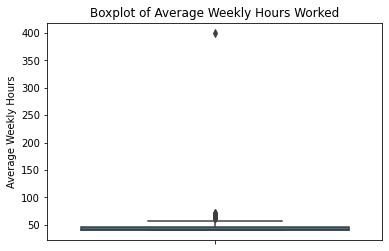

In [30]:
# Columns 'AverageWeeklyHoursWorked' has a max value of 400 hours
g = sns.boxplot(data = df, y ='AverageWeeklyHoursWorked')
g.set_title("Boxplot of Average Weekly Hours Worked")
g.set(ylabel = "Average Weekly Hours")
plt.show()

In [31]:
# Columns 'AverageWeeklyHoursWorked' has a max value of 400 hours
df['AverageWeeklyHoursWorked'] = df['AverageWeeklyHoursWorked'].replace(\
    df['AverageWeeklyHoursWorked'].max(), df['AverageWeeklyHoursWorked'].median())
print(
    f"The new Maximum Average Number of Weekly Hourse Worded is {df['AverageWeeklyHoursWorked'].max()}")

The new Maximum Average Number of Weekly Hourse Worded is 71.0


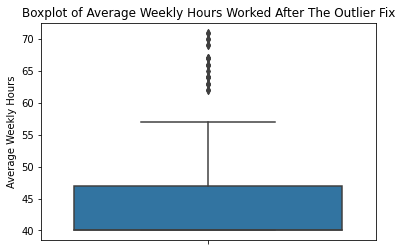

In [32]:
# Boxplots before and after the unrealistics datapoint fix
g1 = sns.boxplot(data=df, y='AverageWeeklyHoursWorked')
g1.set_title("Boxplot of Average Weekly Hours Worked After The Outlier Fix")
g1.set(ylabel="Average Weekly Hours")
plt.show()

In [33]:
# Finalised dataset
df.tail()

,EmployeeID,Age,Resigned,BusinessTravel,BusinessUnit,EducationLevel,Gender,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,AverageWeeklyHoursWorked,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInRole,YearsSinceLastPromotion,YearsWithCurrManager
1477,6680,40,False,NON-TRAVEL,CONSULTANTS,4,MALE,3,DIVORCED,3935.0,3,False,11,3,40.0,11,2,4,8,6,1,6
1478,3190,33,True,TRAVEL_RARELY,CONSULTANTS,4,MALE,3,SINGLE,2686.0,1,False,13,3,40.0,10,2,2,10,8,8,10
1479,9017,38,False,TRAVEL_RARELY,CONSULTANTS,2,FEMALE,3,MARRIED,3700.0,1,False,0,2,46.0,5,3,3,5,4,0,3
1480,2477,32,False,TRAVEL_FREQUENTLY,SALES,4,MALE,4,SINGLE,4802.0,8,False,13,3,50.0,4,2,4,1,1,0,1
1481,3238,36,False,NON-TRAVEL,CONSULTANTS,4,FEMALE,3,MARRIED,4802.0,2,False,14,3,40.0,15,3,3,13,10,10,5


In [34]:
# Export the cleaned dataset as a CSV file
df.to_csv('S4115699.csv')

# 2. Exploratory Data Analysis (EDA)
## 2.1 Analysis on three variables

We display the three columns for our visualisations, BusinessUnit will be visualised using a countplot that concentrates on nominal data, EducationLevel will be displayed with a boxplot that can process ordinal data and MonthlyIncome will be visualised using a Distribution Plot, which is designed for ratio data. 

In [35]:
# Selecting three columns
df[['BusinessUnit', 'EducationLevel', 'MonthlyIncome']].head()

,BusinessUnit,EducationLevel,MonthlyIncome
0,SALES,2,5993.0
1,CONSULTANTS,1,5130.0
2,CONSULTANTS,2,2090.0
3,CONSULTANTS,4,2909.0
4,CONSULTANTS,1,3468.0


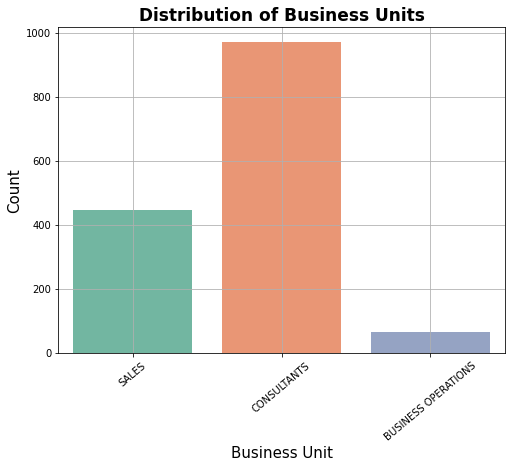

In [36]:
# How many Business Units does the company have - Exploration of a nominal variable
plt.figure(figsize=(8,6))
sns.countplot(x='BusinessUnit', data = df, palette = 'Set2')
plt.title('Distribution of Business Units', fontsize=17, fontweight = 'bold')
plt.xlabel('Business Unit', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.xticks(rotation = 40)
plt.grid()
plt.show()

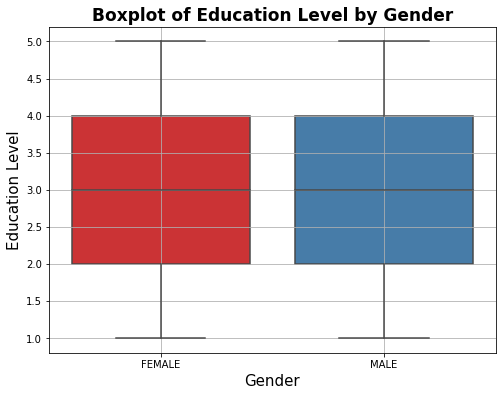

In [37]:
# Having a closer look into Education Level by Sex
plt.figure(figsize = (8,6))
sns.boxplot(data = df, x = 'Gender', y = 'EducationLevel', palette = 'Set1')
plt.title('Boxplot of Education Level by Gender', fontsize = 17, fontweight = 'bold')
plt.xlabel('Gender', fontsize = 15)
plt.ylabel('Education Level', fontsize = 15)
plt.grid()
plt.show()

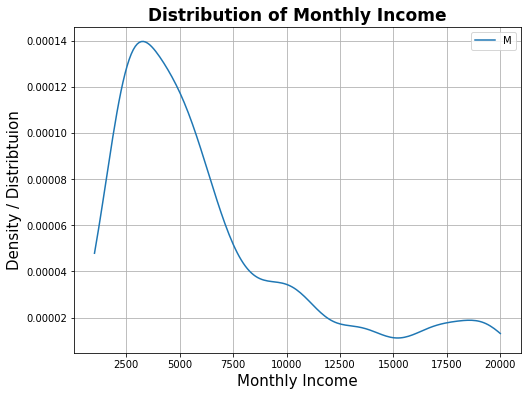

In [38]:
# Visualise the distribution of Monthly Income
plt.figure(figsize = (8,6))
sns.kdeplot(data = df, x = 'MonthlyIncome', cut=0)
plt.title('Distribution of Monthly Income', fontsize = 17, fontweight = 'bold')
plt.xlabel('Monthly Income', fontsize = 15)
plt.ylabel('Density / Distribtuion', fontsize = 15)
plt.grid()
plt.legend('MonthlyIncome')
plt.show()

## 2.2 Relationships between variables

### 2.2.1 Relation between Years At Company and Monthly Income

The below three plots display the Relationship and Correlations between variables to gain further insights why Consultants leave the company and how to improve the current company situation. 

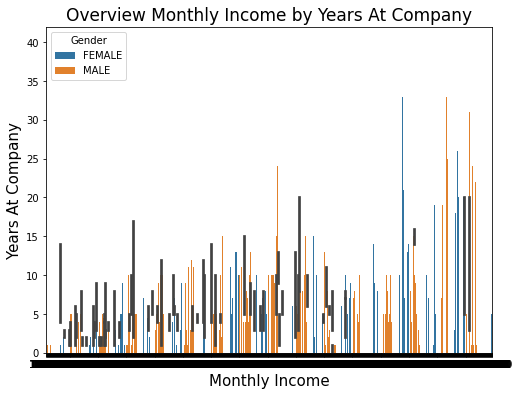

In [39]:
# Visualise Monthly Income non-ideal attempt
plt.figure(figsize = (8,6))
p = sns.barplot(data = df, x = 'MonthlyIncome', y = 'YearsAtCompany', hue = 'Gender')
p.set_title('Overview Monthly Income by Years At Company', fontsize = 17)
p.set_xlabel('Monthly Income', fontsize = 15)
p.set_ylabel('Years At Company', fontsize = 15)
plt.show()

<b>As the above visualisation is very confusing, we simplify it's output by grouping Montly Income into Income categories. </b>

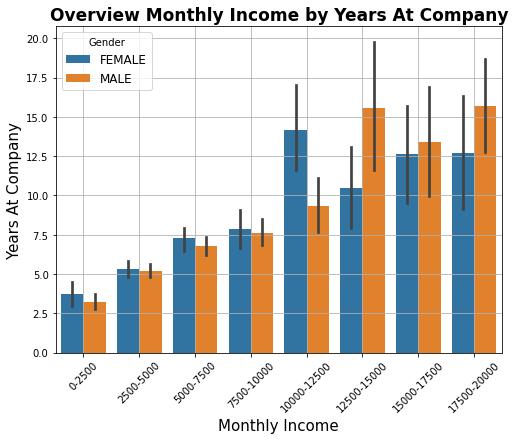

In [40]:
# Add a new variable with binned 'MonthlyIncome'
bins = [0, 2500, 5000, 7500, 10000, 12500, 15000, 17500, 20000]
labels = ['0-2500', '2500-5000', '5000-7500', '7500-10000', '10000-12500', '12500-15000', '15000-17500', '17500-20000']
df['MonthlyIncome_Grouped'] = pd.cut(df['MonthlyIncome'], bins = bins, labels = labels, right = False)

# Visualise Grouped Monthly Income Variable For Better Interpretation
plt.figure(figsize = (8,6))
p = sns.barplot(data=df, x='MonthlyIncome_Grouped',y='YearsAtCompany', hue='Gender')
p.set_title('Overview Monthly Income by Years At Company', fontsize = 17, fontweight = 'bold')
p.set_xlabel('Monthly Income', fontsize = 15)
p.set_ylabel('Years At Company', fontsize = 15)
plt.xticks(rotation = 45)
plt.legend(title = 'Gender', fontsize = 12)
plt.grid()
plt.show()

### 2.2.2 Correlation between MonthlyIncome and EducationLevel

To display the Correlation between two variables, the Scatterplot might be the best choice. We further discover if the Education Level or Age have an impact on the Percent Salary Hike to enhance motivation for Consultants.

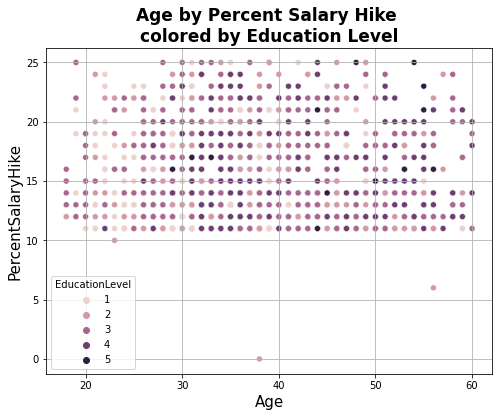

In [41]:
### 2.2.2 Correlation between MonthlyIncome and EducationLevel
plt.figure(figsize=(8,6))
sns.scatterplot(data = df, x = 'Age', y = 'PercentSalaryHike', hue = 'EducationLevel')
plt.title('Age by Percent Salary Hike \ncolored by Education Level', \
          fontsize = 17, fontweight = 'bold')
plt.xlabel('Age', fontsize = 15)
plt.ylabel('PercentSalaryHike', fontsize = 15)
plt.grid()
plt.plot()
plt.show()

In [42]:
# Display the correlation between above visualised variables
df[['Age','PercentSalaryHike','EducationLevel']].corr()

,Age,PercentSalaryHike,EducationLevel
Age,1.000000,-0.000311,0.206958
PercentSalaryHike,-0.000311,1.000000,-0.008425
EducationLevel,0.206958,-0.008425,1.000000


### 2.2.3 Correlation Between Eight Selected Variables Of All Data Kinds

The below Heatmap shows the Correlation of all nominal data. It is a powerful way of discovering the Relationships between different fators in one convenient plot. It also shows in one convenient visualisation what company culture Revolution Consulting values.

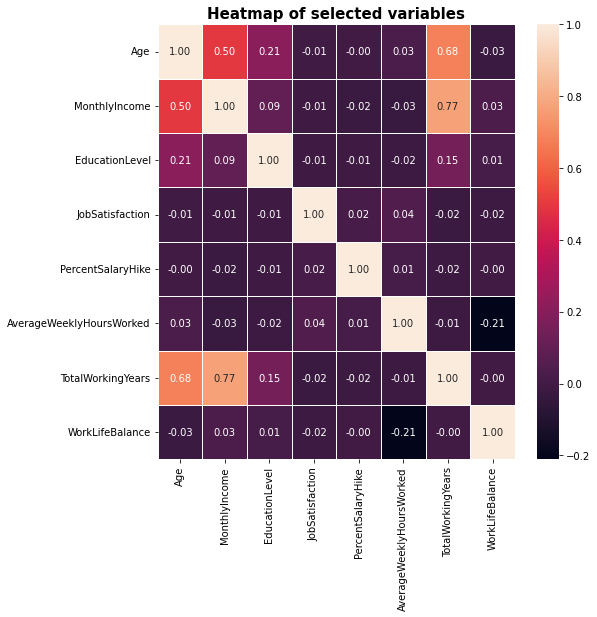

In [43]:
# Create a variable with selected variables of all data types 
corr_data = df[['Age','MonthlyIncome','EducationLevel','JobSatisfaction','PercentSalaryHike',\
                'AverageWeeklyHoursWorked','TotalWorkingYears','WorkLifeBalance']].corr()

# Visualise a Heatmap representing all Correlations/Relationships between the variables
plt.figure(figsize=(8,8))
sns.heatmap(corr_data, annot = True, linewidths = 0.6, fmt = '.2f')
plt.title('Heatmap of selected variables', fontsize = 15, fontweight = 'bold')
plt.xticks(rotation = 90)
plt.show()

<b>All insights of our analysis can be found in the Assignment report.